In [1]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
random_state=4
import pandas as pd
from Evaluation import synthsonic, writetodict, plotter, plot_oversampling, evaluate_oversamplers
import smote_variants as sv
from sklearn.tree import DecisionTreeClassifier

In [10]:
path = "/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/Datasets/"

data = pd.read_csv(path+"train.csv",index_col=0)

In [15]:
y = data['target'].values
X = data.drop(columns=['target']).values
print(X.shape)
X

(595212, 57)


array([[ 2.,  2.,  5., ...,  0.,  0.,  1.],
       [ 1.,  1.,  7., ...,  0.,  1.,  0.],
       [ 5.,  4.,  9., ...,  0.,  1.,  0.],
       ...,
       [ 1.,  1., 10., ...,  0.,  0.,  0.],
       [ 5.,  2.,  3., ...,  1.,  0.,  0.],
       [ 0.,  1.,  8., ...,  0.,  0.,  0.]])

In [17]:
data_dict = writetodict(data, 'porto_seguro')
X,y,name = data_dict['data'],data_dict['target'],data_dict['name']

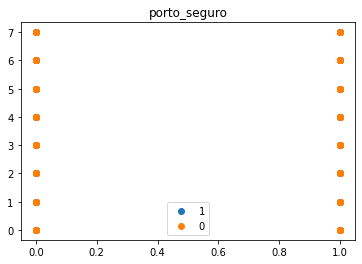

Counter({0: 503955, 1: 91257})


In [19]:
datasets = [data_dict]
oversamplers = [sv.NoSMOTE, sv.SMOTE, sv.NT_SMOTE, sv.SMOTE_D, synthsonic]
classifier = DecisionTreeClassifier(random_state=random_state)
random_state = random_state

In [20]:
results = evaluate_oversamplers(datasets, oversamplers, classifier, random_state)

2021-06-03 14:53:19,686:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-06-03 14:53:19,686:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


('NoSMOTE', '{}')


2021-06-03 14:53:36,573:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:53:36,573:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 14:54:58,667:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:54:58,667:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 14:56:13,769:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:56:13,769:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 14:57:36,860:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FE57BB6D270}")
2021-06-03 14:57:36,860:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FE57BB6D270}")


('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7FE57BB6D270}")
minority class 1, min dataset (61174, 57)


Building tree: 100%|██████████| 1540/1540.0 [00:03<00:00, 438.80it/s]
Generating for node: 27: 100%|██████████| 57/57 [00:22<00:00,  2.56it/s]
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/synthsonic-0.1.0-py3.7.egg/synthsonic/models/kde_copula_nn_pdf.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.max_weight_ = max_p1f / (1. - max_p1f)
Generating for node: 27: 100%|██████████| 57/57 [00:21<00:00,  2.63it/s]


In [21]:
resultdf = pd.DataFrame(results)
resultdf

,dataset,sampler,clf_score,recall,roc_auc_score,f1_score,brier_score_loss,runtime
0,porto_seguro,NoSMOTE,0.723577,0.178074,0.500154,0.164808,0.276423,0.123067
1,porto_seguro,SMOTE,0.719423,0.175116,0.496490,0.160495,0.280577,64.229822
2,porto_seguro,NT_SMOTE,0.723373,0.178739,0.500306,0.165220,0.276627,58.725113
3,porto_seguro,SMOTE_D,0.722009,0.179636,0.499868,0.165232,0.277991,61.807080
4,porto_seguro,synthsonic,0.724086,0.184789,0.503205,0.170226,0.275914,144.560490
